In [1]:
from pyspark.sql import SparkSession

In [2]:
# initialization of spark context
spark = SparkSession.builder.appName("pySpWordCount").getOrCreate()
sc = spark.sparkContext

In [11]:
# read data, as a result we get RDD of lines
txtFile = sc.textFile("file:///D://DataSets//data3.txt")

### Get Words

In [12]:
words = txtFile.flatMap(lambda line:line.lower().split(" "))

In [13]:
wrds = words.collect()
print(len(wrds))
print(wrds)

225
['the', 'hdfs', 'file', 'system', 'includes', 'a', 'so-called', 'secondary', 'namenode,', 'which', 'misleads', 'some', 'people', 'into', 'thinking', 'that', 'when', 'the', 'primary', 'namenode', 'goes', 'offline,', 'the', 'secondary', 'namenode', 'takes', 'over.', 'in', 'fact,', 'the', 'secondary', 'namenode', 'regularly', 'connects', 'with', 'the', 'primary', 'namenode', 'and', 'builds', 'snapshots', 'of', 'the', 'primary', "namenode's", 'directory', 'information,', 'which', 'the', 'system', 'then', 'saves', 'to', 'local', 'or', 'remote', 'directories.', 'these', 'checkpointed', 'images', 'can', 'be', 'used', 'to', 'restart', 'a', 'failed', 'primary', 'namenode', 'without', 'having', 'to', 'replay', 'the', 'entire', 'journal', 'of', 'file-system', 'actions,', 'then', 'to', 'edit', 'the', 'log', 'to', 'create', 'an', 'up-to-date', 'directory', 'structure.', 'because', 'the', 'namenode', 'is', 'the', 'single', 'point', 'for', 'storage', 'and', 'management', 'of', 'metadata,', 'it', 

### Remove puctuations and special characters

In [14]:
import re

In [15]:
punc = '[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~�’]'
wordp= words.map(lambda word: re.sub(punc,"",word) )

In [16]:
wrdp = wordp.collect()
print(wrdp)

['the', 'hdfs', 'file', 'system', 'includes', 'a', 'socalled', 'secondary', 'namenode', 'which', 'misleads', 'some', 'people', 'into', 'thinking', 'that', 'when', 'the', 'primary', 'namenode', 'goes', 'offline', 'the', 'secondary', 'namenode', 'takes', 'over', 'in', 'fact', 'the', 'secondary', 'namenode', 'regularly', 'connects', 'with', 'the', 'primary', 'namenode', 'and', 'builds', 'snapshots', 'of', 'the', 'primary', 'namenodes', 'directory', 'information', 'which', 'the', 'system', 'then', 'saves', 'to', 'local', 'or', 'remote', 'directories', 'these', 'checkpointed', 'images', 'can', 'be', 'used', 'to', 'restart', 'a', 'failed', 'primary', 'namenode', 'without', 'having', 'to', 'replay', 'the', 'entire', 'journal', 'of', 'filesystem', 'actions', 'then', 'to', 'edit', 'the', 'log', 'to', 'create', 'an', 'uptodate', 'directory', 'structure', 'because', 'the', 'namenode', 'is', 'the', 'single', 'point', 'for', 'storage', 'and', 'management', 'of', 'metadata', 'it', 'can', 'become', '

### Remove Stop Words

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('omw-1.4')

In [19]:
stp_words = list(stopwords.words('english'))
print(len(stp_words))
print(sorted(stp_words))

179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'so

In [20]:
words_wo_sw = wordp.filter(lambda x: (x not in stp_words) and (x != ''))

In [21]:
wrds_wo_sw = words_wo_sw.collect()
print(len(wrds_wo_sw))
print(wrds_wo_sw)

132
['hdfs', 'file', 'system', 'includes', 'socalled', 'secondary', 'namenode', 'misleads', 'people', 'thinking', 'primary', 'namenode', 'goes', 'offline', 'secondary', 'namenode', 'takes', 'fact', 'secondary', 'namenode', 'regularly', 'connects', 'primary', 'namenode', 'builds', 'snapshots', 'primary', 'namenodes', 'directory', 'information', 'system', 'saves', 'local', 'remote', 'directories', 'checkpointed', 'images', 'used', 'restart', 'failed', 'primary', 'namenode', 'without', 'replay', 'entire', 'journal', 'filesystem', 'actions', 'edit', 'log', 'create', 'uptodate', 'directory', 'structure', 'namenode', 'single', 'point', 'storage', 'management', 'metadata', 'become', 'bottleneck', 'supporting', 'huge', 'number', 'files', 'especially', 'large', 'number', 'small', 'files', 'hdfs', 'federation', 'new', 'addition', 'aims', 'tackle', 'problem', 'certain', 'extent', 'allowing', 'multiple', 'namespaces', 'served', 'separate', 'namenodes', 'advantage', 'using', 'hdfs', 'data', 'awaren

### Convert plural to Singular

In [22]:
from pattern.en import singularize

In [23]:
word_s= words_wo_sw.map(lambda word: singularize(word))

In [24]:
wrd_s = word_s.collect()
print(wrd_s)

['hdf', 'file', 'system', 'include', 'socalled', 'secondary', 'namenode', 'mislead', 'person', 'thinking', 'primary', 'namenode', 'go', 'offline', 'secondary', 'namenode', 'take', 'fact', 'secondary', 'namenode', 'regularly', 'connect', 'primary', 'namenode', 'build', 'snapshot', 'primary', 'namenode', 'directory', 'information', 'system', 'save', 'local', 'remote', 'directory', 'checkpointed', 'image', 'used', 'restart', 'failed', 'primary', 'namenode', 'without', 'replay', 'entire', 'journal', 'filesystem', 'action', 'edit', 'log', 'create', 'uptodate', 'directory', 'structure', 'namenode', 'single', 'point', 'storage', 'management', 'metadatum', 'become', 'bottleneck', 'supporting', 'huge', 'number', 'file', 'especially', 'large', 'number', 'small', 'file', 'hdf', 'federation', 'new', 'addition', 'aim', 'tackle', 'problem', 'certain', 'extent', 'allowing', 'multiple', 'namespace', 'served', 'separate', 'namenode', 'advantage', 'using', 'hdf', 'datum', 'awarenes', 'job', 'tracker', '

### Map each word

In [25]:
wordMap= word_s.map(lambda word: (word, 1))

In [26]:
wrdMp = wordMap.collect()
print(wrdMp)

[('hdf', 1), ('file', 1), ('system', 1), ('include', 1), ('socalled', 1), ('secondary', 1), ('namenode', 1), ('mislead', 1), ('person', 1), ('thinking', 1), ('primary', 1), ('namenode', 1), ('go', 1), ('offline', 1), ('secondary', 1), ('namenode', 1), ('take', 1), ('fact', 1), ('secondary', 1), ('namenode', 1), ('regularly', 1), ('connect', 1), ('primary', 1), ('namenode', 1), ('build', 1), ('snapshot', 1), ('primary', 1), ('namenode', 1), ('directory', 1), ('information', 1), ('system', 1), ('save', 1), ('local', 1), ('remote', 1), ('directory', 1), ('checkpointed', 1), ('image', 1), ('used', 1), ('restart', 1), ('failed', 1), ('primary', 1), ('namenode', 1), ('without', 1), ('replay', 1), ('entire', 1), ('journal', 1), ('filesystem', 1), ('action', 1), ('edit', 1), ('log', 1), ('create', 1), ('uptodate', 1), ('directory', 1), ('structure', 1), ('namenode', 1), ('single', 1), ('point', 1), ('storage', 1), ('management', 1), ('metadatum', 1), ('become', 1), ('bottleneck', 1), ('support

### Reduce to count frequency

In [27]:
wordCount = wordMap.reduceByKey(lambda a,b: a+b)

In [28]:
wrdCount = wordCount.collect()
print(len(wrdCount))
print(wrdCount)

95
[('hdf', 4), ('include', 1), ('socalled', 1), ('namenode', 9), ('mislead', 1), ('person', 1), ('primary', 4), ('go', 1), ('take', 1), ('connect', 1), ('snapshot', 1), ('directory', 3), ('save', 1), ('remote', 1), ('image', 1), ('used', 2), ('restart', 1), ('failed', 1), ('replay', 1), ('entire', 1), ('action', 1), ('edit', 1), ('single', 1), ('point', 1), ('storage', 1), ('management', 1), ('become', 1), ('bottleneck', 1), ('huge', 1), ('especially', 1), ('large', 1), ('new', 1), ('tackle', 1), ('certain', 1), ('extent', 1), ('allowing', 1), ('multiple', 1), ('served', 1), ('using', 1), ('awarenes', 2), ('job', 4), ('tracker', 4), ('task', 2), ('schedule', 1), ('reduce', 1), ('hadoop', 1), ('significant', 1), ('demonstrated', 1), ('designed', 1), ('immutable', 1), ('may', 1), ('suitable', 1), ('requiring', 1), ('writeoperation', 1), ('file', 5), ('system', 4), ('secondary', 3), ('thinking', 1), ('offline', 1), ('fact', 1), ('regularly', 1), ('build', 1), ('information', 1), ('local'

### Display sorted Output

In [29]:
print(sorted(wrdCount))

[('action', 1), ('addition', 1), ('advantage', 2), ('aim', 1), ('allowing', 1), ('alway', 1), ('available', 1), ('awarenes', 2), ('become', 1), ('bottleneck', 1), ('build', 1), ('certain', 1), ('checkpointed', 1), ('concurrent', 1), ('connect', 1), ('create', 1), ('dataintensive', 1), ('datum', 2), ('demonstrated', 1), ('designed', 1), ('directory', 3), ('edit', 1), ('entire', 1), ('especially', 1), ('extent', 1), ('fact', 1), ('failed', 1), ('federation', 1), ('file', 5), ('filesystem', 1), ('go', 1), ('hadoop', 1), ('hdf', 4), ('huge', 1), ('image', 1), ('immutable', 1), ('impact', 1), ('include', 1), ('information', 1), ('job', 4), ('jobcompletion', 1), ('journal', 1), ('large', 1), ('local', 1), ('location', 1), ('log', 1), ('management', 1), ('map', 1), ('may', 1), ('metadatum', 1), ('mislead', 1), ('mostly', 1), ('multiple', 1), ('namenode', 9), ('namespace', 1), ('new', 1), ('number', 2), ('offline', 1), ('person', 1), ('point', 1), ('primary', 4), ('problem', 1), ('reduce', 1),

### Generate Word Cloud

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [51]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 500).generate(str(wrdCount))

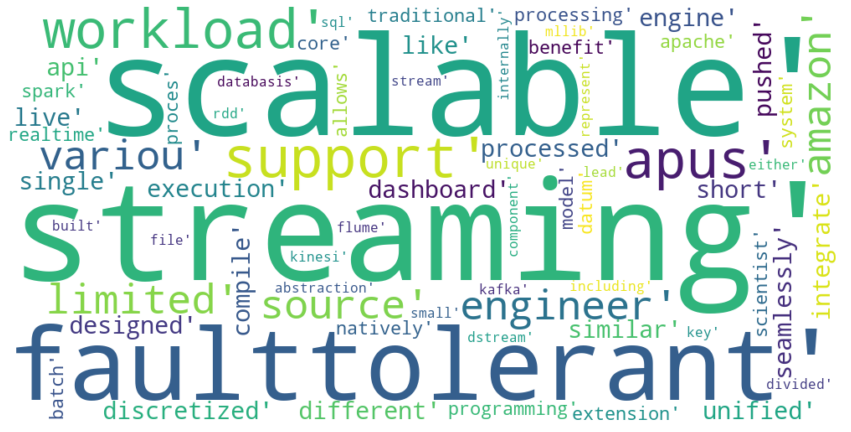

In [52]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [15, 8]

### Create df

In [53]:
df = spark.createDataFrame(wrdCount, ['Word','Count'])
df.show(5)

+-------------+-----+
|         Word|Count|
+-------------+-----+
|    streaming|   14|
|     scalable|    2|
|faulttolerant|    2|
|      support|    2|
|     workload|    2|
+-------------+-----+
only showing top 5 rows



In [56]:
sc.stop()
spark.stop()